/Users/vladimirdesatov/anaconda/lib/python3.5/site-packages/scipy/cluster/vq.py:653: UserWarning: One of the clusters is empty. Re-run kmean with a different initialization.
  warnings.warn("One of the clusters is empty. "


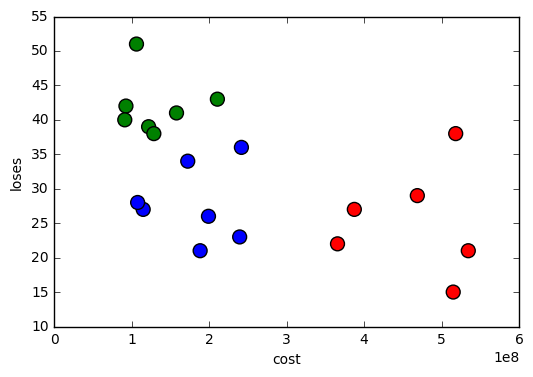

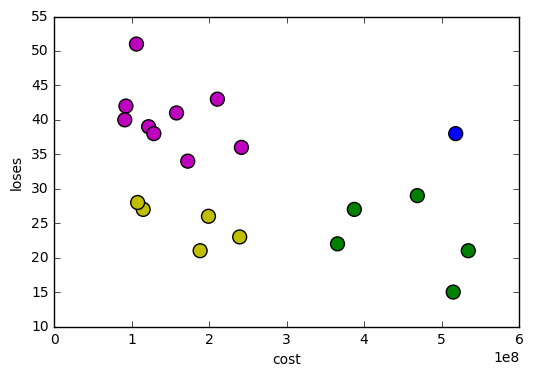

In [1]:
# Занятие 4.3. Работа с данными

import pandas as pd
from pprint import pprint

# Включаем отображение в блокноте
%matplotlib inline

"""
ИСТОЧНИК ДАННЫХ
• REST API статистики матчей
• Документация
http://api.football-data.org/docs/v1/index.html
• Регистрация для безлимитного использования
http://api.football-data.org/register
X-Auth-Token
API token:	4bff971ff8f74db6935b7cf9a33def51
"""

API_TOKEN = '4bff971ff8f74db6935b7cf9a33def51'

def call_api(url, result_key):
    import requests
    json = {}
    try:
        json = requests.get(url, headers = {'X-Auth-Token' : API_TOKEN}).json()
        return json[result_key]
    except:
        return None

    # Поучаем информвцию о команде, ее стоимости и количестве поражений

def teams_get_info(teams):
# Поучаем информвцию о команде, ее стоимости и количестве поражений
    for team in teams:
        cost = team['squadMarketValue']
        fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
        loses = 0
        for f in fixtures:
            if team['name'] == f['homeTeamName']:
                loses += f['result']['goalsAwayTeam'] if f['result']['goalsAwayTeam'] else 0
            else:
                loses += f['result']['goalsHomeTeam'] if f['result']['goalsHomeTeam'] else 0
#            print('Team "{}", {} cost, {} loses'.format(team['name'], team['squadMarketValue'], loses))
            team['cost'] = cost      # стоимость
            team['loses'] = loses    # поражения
    return teams

def string_to_int(string):
# Преобразуем строку 534,250,000 € к числу 534250000
    string = string[:-2]                         # удаляем символы ' €'
    string_int = int(string.replace(',', ''))    # удляем пробелы
    return string_int

def teams_to_pd(teams):
# Преобразуем для pandas
    team_for_pd = []
    for team in teams:
        if team['cost']:
            team_for_pd.append({'name': team['name'],
                                'cost': string_to_int(team['squadMarketValue']),
                                'loses': team['loses']})
    team_for_pd
    team_pd = pd.DataFrame(team_for_pd)
    team_pd
    return team_pd

def change_pd(team_pd):
# Преобразуем в pandas для дальнейшего использования
# Прижелании можно отобразить
#    team_pd.plot.scatter(x='cost', y='loses', s=100)
# Удаляем колонку с именами
    del team_pd['name']
    return team_pd

def teams_clusters(team_pd, number_clusters):
# Строим кластеры
# number_clusters - число кластеров
    from scipy.cluster.vq import whiten, kmeans2
# Нормализация данных
    whitened = whiten(team_pd.as_matrix())
    whitened
    # Вызываем результирующие кластеры
    centroids, cluster_map = kmeans2(whitened, number_clusters)
    centroids, cluster_map
    # Задаем цвета для каждого кластера
    colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
    colors = [colors_map[c] for c in cluster_map]
    colors
    # Отображаем
    team_pd.plot.scatter(x='cost', y='loses', c=colors, s=100)

# Задаем путь
URL = 'http://api.football-data.org/v1/competitions/398/teams'

# Получаем информацию о командах
teams = call_api(URL, 'teams')
#pprint(teams)

# Получаем информвцию о командах, их стоимости и количестве поражений
teams_info = teams_get_info(teams)
#pprint(teams_info)

# Преобразуем для pandas
team_pd = teams_to_pd(teams_info)
#pprint(team_pdteam_pd)

# Обработка pandas
team_pd = change_pd(team_pd)
#pprint(team_pdteam_pd)

# Строим кластеры
teams_clusters(team_pd, 3)    # 3 кластера
teams_clusters(team_pd, 5)    # 5 кластеров